In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# helper function for visualising centroid
def plot_centroid(df, centroid):
    # plotting scatterplot for both data and centroids
    sns.scatterplot(data = centroid, x = 'centroid', y=0, marker="*", s=550)
    sns.scatterplot(data = df, x='average_return', y=0, hue='cluster')

    # remove legend for simpler presentation
    plt.legend().remove() 

    # remove Y axis for better presentation
    plt.tick_params(left = False, labelleft = False)
    
    plt.title('Average weekly return of each pair by cluster with centroid')
    plt.show()

# read csv data and check the data
df = pd.read_csv('../data/average_weekly.csv')
df.head()

,ccy,average_return
0,USDAUD,-0.000072
1,USDNZD,-0.000169
2,USDEUR,-0.000094
3,USDGBP,0.000198
4,USDCAD,-0.000081


In [2]:
# isolate data out as X for clustering
X = df.set_index('ccy')

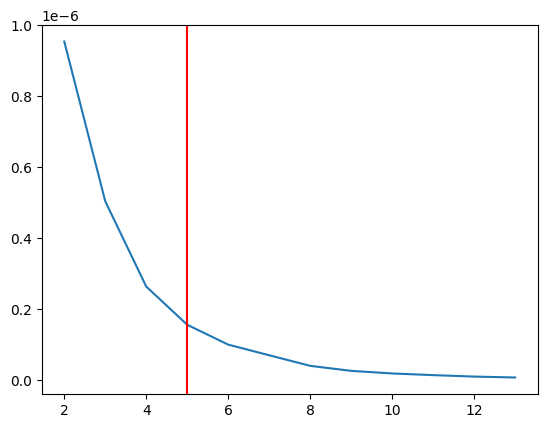

In [3]:
# utilise elbow curve to determine the best number of cluster
SSE = []
for k in range(2,14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(2,14),SSE)
plt.axvline(x=5, c="r")

The best cluster looks to lie between 2 to 5  
We would choose 5 in this case

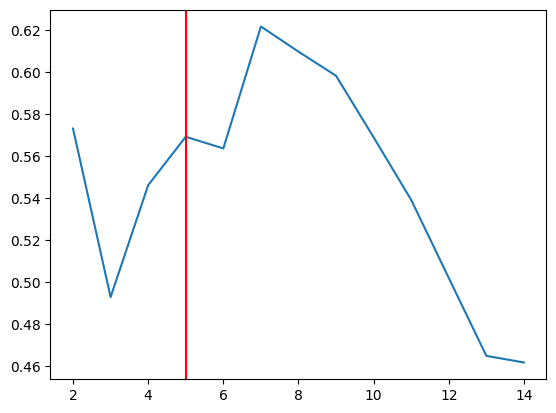

In [4]:
# counter check with silhouette score
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
silhouette_avg = []
for n in clusters_range:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, labels))
    
plt.plot(clusters_range, silhouette_avg)
plt.axvline(x=5, c="r")

cluster of 5 might not have the best core, but using the best number of cluster shown in silhouette score of 10 does not make sense for 28 parameters

I will stick to 5 for now in this exploration

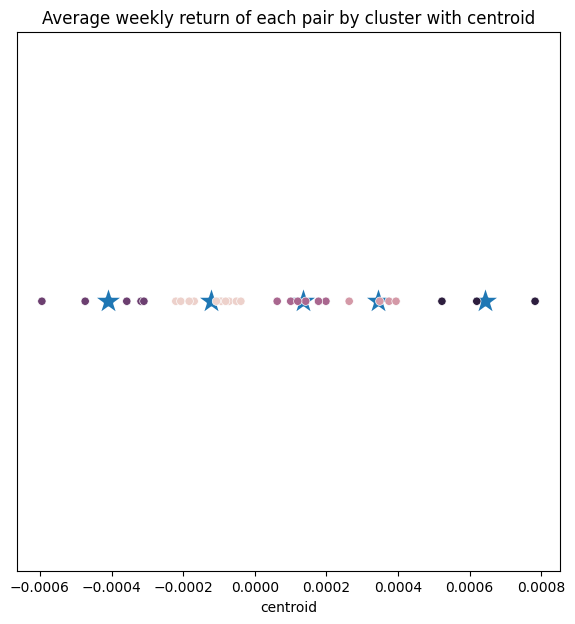

In [5]:
# set up number of cluster
n_cluster = 5

# initiate and fit K means
km = KMeans(n_cluster, random_state=69)
km.fit(X)

# assign kmean cluster into initial dataframe
df['cluster'] = km.labels_

# extract centroids value for plotting
centroids = pd.DataFrame(km.cluster_centers_)
centroids.rename(columns={0:'centroid'}, inplace=True)

plt.figure(figsize=(7,7));
plot_centroid(df, centroids)

In [6]:
# summarise cluster information for later analysis

# a list of respective pairs and the corresponding custer label
cluster_details = [(name, cluster) for name, cluster in zip(X.index, km.labels_)]
clusters = []
for i in range (0, n_cluster):
    tmp = []
    for detail in cluster_details:
        if detail[1] == i:
            tmp.append(detail[0])
    clusters.append(tmp)

# print out to check details of each cluster
for i in range(len(clusters)):
    print('Cluster', i+1, 'consists of', clusters[i])

Cluster 1 consists of ['USDAUD', 'USDNZD', 'USDEUR', 'USDCAD', 'AUDNZD', 'GBPAUD', 'AUDCHF', 'EURNZD', 'NZDCHF', 'GBPCAD']
Cluster 2 consists of ['NZDCAD', 'EURGBP', 'EURJPY', 'CADJPY']
Cluster 3 consists of ['USDGBP', 'USDJPY', 'EURAUD', 'AUDCAD', 'EURCAD', 'GBPJPY']
Cluster 4 consists of ['USDCHF', 'GBPNZD', 'EURCHF', 'GBPCHF', 'CADCHF']
Cluster 5 consists of ['AUDJPY', 'NZDJPY', 'CHFJPY']


In [7]:
# export cluster information out as dataframe for later use
# do take note that each row of data refers to each cluster
clusters = pd.DataFrame(clusters)
clusters.to_csv('../data/return_clusters.csv', index=False)

In [8]:
clusters

,0,1,2,3,4,5,6,7,8,9
0,USDAUD,USDNZD,USDEUR,USDCAD,AUDNZD,GBPAUD,AUDCHF,EURNZD,NZDCHF,GBPCAD
1,NZDCAD,EURGBP,EURJPY,CADJPY,None,None,None,None,None,None
2,USDGBP,USDJPY,EURAUD,AUDCAD,EURCAD,GBPJPY,None,None,None,None
3,USDCHF,GBPNZD,EURCHF,GBPCHF,CADCHF,None,None,None,None,None
4,AUDJPY,NZDJPY,CHFJPY,None,None,None,None,None,None,None
